# Tensor Basics

In [1]:
import torch
import numpy as np

In [6]:
x = torch.empty(2,3,4)
x

tensor([[[ 4.5115e+18,  3.2886e-41,  4.4698e+15,  3.2886e-41],
         [ 8.9683e-44,  0.0000e+00,  1.1210e-43,  0.0000e+00],
         [-2.4178e+22,  3.2881e-41,  6.9061e-07,  1.0812e-05]],

        [[ 5.4369e+22,  2.7623e-06,  2.1707e-18,  1.6678e+19],
         [ 7.0976e+22,  2.1715e-18,  3.0135e+29,  1.7610e+19],
         [ 1.1625e+27,  1.4580e-19,  7.1856e+22,  4.3605e+27]]])

In [11]:
x = torch.rand(2,2, dtype = torch.float32) #==> uniform #torch.ones, torch.zeros
x, x.size(), x.dtype

(tensor([[0.6116, 0.4858],
         [0.4864, 0.3193]]),
 torch.Size([2, 2]),
 torch.float32)

In [17]:
x= torch.randint(low=0, high=5, size=(5,2))
x

tensor([[4, 2],
        [3, 1],
        [0, 4],
        [0, 4],
        [0, 2]])

In [18]:
x= torch.randn(2,2) #gaussian 0 mean 1 variance
x

tensor([[-0.4477,  0.4744],
        [ 1.2094,  1.2045]])

In [19]:
x = torch.tensor([2.5,0.1])
x

tensor([2.5000, 0.1000])

In [20]:
x = torch.rand(2,2)
y = torch.randn(2,2)
x, y

(tensor([[0.4499, 0.9724],
         [0.0754, 0.0533]]),
 tensor([[0.7713, 1.0735],
         [1.5545, 0.3259]]))

In [21]:
x+y, torch.add(x,y)

(tensor([[1.2212, 2.0459],
         [1.6299, 0.3792]]),
 tensor([[1.2212, 2.0459],
         [1.6299, 0.3792]]))

In [22]:
y.add_(x) #inplace operation

tensor([[1.2212, 2.0459],
        [1.6299, 0.3792]])

In [23]:
x-y, torch.sub(x,y), x*y, torch.mul(x,y), x/y, torch.div(x,y)

(tensor([[-0.7713, -1.0735],
         [-1.5545, -0.3259]]),
 tensor([[-0.7713, -1.0735],
         [-1.5545, -0.3259]]),
 tensor([[0.5494, 1.9894],
         [0.1229, 0.0202]]),
 tensor([[0.5494, 1.9894],
         [0.1229, 0.0202]]),
 tensor([[0.3684, 0.4753],
         [0.0462, 0.1405]]),
 tensor([[0.3684, 0.4753],
         [0.0462, 0.1405]]))

In [24]:
x = torch.rand(5,3)
x, x[:,0], x[1,: ], x[1,1], x[1,1].item()

(tensor([[0.0894, 0.8988, 0.8760],
         [0.7711, 0.0532, 0.6798],
         [0.2420, 0.7276, 0.9225],
         [0.7591, 0.2737, 0.8183],
         [0.3799, 0.0693, 0.5864]]),
 tensor([0.0894, 0.7711, 0.2420, 0.7591, 0.3799]),
 tensor([0.7711, 0.0532, 0.6798]),
 tensor(0.0532),
 0.05317288637161255)

In [25]:
x = torch.rand(4,4)
x, x.view(16), x.view(-1,8)

(tensor([[0.1578, 0.1795, 0.6092, 0.8303],
         [0.6530, 0.7640, 0.2459, 0.7000],
         [0.7226, 0.1461, 0.7610, 0.4756],
         [0.9007, 0.4612, 0.5894, 0.6360]]),
 tensor([0.1578, 0.1795, 0.6092, 0.8303, 0.6530, 0.7640, 0.2459, 0.7000, 0.7226,
         0.1461, 0.7610, 0.4756, 0.9007, 0.4612, 0.5894, 0.6360]),
 tensor([[0.1578, 0.1795, 0.6092, 0.8303, 0.6530, 0.7640, 0.2459, 0.7000],
         [0.7226, 0.1461, 0.7610, 0.4756, 0.9007, 0.4612, 0.5894, 0.6360]]))

In [28]:
x = torch.ones(5)
y = x.numpy()
type(x), type(y)

(torch.Tensor, numpy.ndarray)

In [29]:
# if the tensor or numpy in cpu memory, they share same location
# in-place modification will affect the other one
x.add_(1)
x,y

(tensor([2., 2., 2., 2., 2.]), array([2., 2., 2., 2., 2.], dtype=float32))

In [30]:
x = np.ones(5)
y = torch.from_numpy(x)
x, y

(array([1., 1., 1., 1., 1.]),
 tensor([1., 1., 1., 1., 1.], dtype=torch.float64))

In [31]:
x +=1
x,y

(array([2., 2., 2., 2., 2.]),
 tensor([2., 2., 2., 2., 2.], dtype=torch.float64))

In [33]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    x = torch.ones(5, device = device)
    y = torch.ones(5)
    y = y.to(device)
    z = x + y
    z = z.to("cpu")

In [34]:
x = torch.ones(5, requires_grad = True)
x

tensor([1., 1., 1., 1., 1.], requires_grad=True)

# Autograd

In [52]:
import torch

In [36]:
x = torch.randn(3, requires_grad = True)
x

tensor([0.5655, 1.4161, 1.0202], requires_grad=True)

In [37]:
y = x+2
y

tensor([2.5655, 3.4161, 3.0202], grad_fn=<AddBackward0>)

In [44]:
z = y*y*2
z

tensor([13.1634, 23.3391, 18.2434], grad_fn=<MulBackward0>)

In [45]:
z = z.mean()
z

tensor(18.2486, grad_fn=<MeanBackward0>)

In [46]:
z.backward() #dz/dx
x, x.grad

(tensor([0.5655, 1.4161, 1.0202], requires_grad=True),
 tensor([6.8413, 9.1095, 8.0539]))

In [47]:
z2 = y*y*2

# z2.backward() #when z2 is not scalar, backward() will not work
#because in the background it is a vector jacobian product
#to make it working...have to pass vector argument to the backward()
v = torch.tensor([0.1, 1.0, 0.001], dtype = torch.float32)
z2.backward(v)
x, x.grad

(tensor([0.5655, 1.4161, 1.0202], requires_grad=True),
 tensor([ 7.8675, 22.7738,  8.0660]))

In [48]:
#how to stop gradient tracking off
# 3 ways:
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad():

In [49]:
x.requires_grad_(False)
x

tensor([0.5655, 1.4161, 1.0202])

In [50]:
x = torch.rand(3, requires_grad=True)
y = x.detach()
x,y

(tensor([0.4001, 0.8227, 0.9036], requires_grad=True),
 tensor([0.4001, 0.8227, 0.9036]))

In [51]:
with torch.no_grad():
  y = x+2
  print(y)
y, x

tensor([2.4001, 2.8227, 2.9036])


(tensor([2.4001, 2.8227, 2.9036]),
 tensor([0.4001, 0.8227, 0.9036], requires_grad=True))

In [53]:
weights = torch.ones(4, requires_grad = True)
for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)
  #gradients are wrong


tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


In [55]:
weights = torch.ones(4, requires_grad = True)
for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)
  weights.grad.zero_()


tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [57]:
weights = torch.ones(4, requires_grad = True)

optimizer = torch.optim.SGD([weights], lr = 0.01)
optimizer.step()
optimizer.zero_grad()  # will do the same as previous cell

# Backpropagation

In [58]:
import torch

In [66]:
x = torch.tensor(1.0)
y =  torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad = True)

In [67]:
#forward pass and loss

y_hat = w*x #y_hat = 1
loss = (y_hat - y)**2 # =1
print(loss)

tensor(1., grad_fn=<PowBackward0>)


In [68]:
#backward pass
loss.backward()
print(w.grad)

tensor(-2.)


In [ ]:
#update weights

# next forward and

# Gradient Descent

In [69]:
import numpy as np

**GD (All Manually)**

In [71]:
# f = w*x
# f = 2*x

X = np.array([1,2,3,4], dtype= np.float32)
Y = np.array([2,4,6,8], dtype= np.float32)

w = 0.0

#model prediction
def forward(x):
  return w*x
# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted-y)**2).mean()

# gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x-y)

def gradient(x,y, y_predicted):
  return np.dot(2*x, y_predicted-y).mean()

print(f"Prediction before training: f(5) = {forward(5):.3f}")

#Training
learning_rate = 0.01
n_iters =  20

for epoch in range(n_iters):
  #prediction = forward pass
  y_pred = forward(X)

  #loss
  l = loss(Y, y_pred)

  #gradients
  dw = gradient(X,Y, y_pred)

  #update weights
  w -= learning_rate* dw

  if epoch % 2 == 0:
    print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

    print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
Prediction after training: f(5) = 6.000
epoch 3: w = 1.872, loss = 0.76800019
Prediction after training: f(5) = 9.360
epoch 5: w = 1.980, loss = 0.01966083
Prediction after training: f(5) = 9.898
epoch 7: w = 1.997, loss = 0.00050331
Prediction after training: f(5) = 9.984
epoch 9: w = 1.999, loss = 0.00001288
Prediction after training: f(5) = 9.997
epoch 11: w = 2.000, loss = 0.00000033
Prediction after training: f(5) = 10.000
epoch 13: w = 2.000, loss = 0.00000001
Prediction after training: f(5) = 10.000
epoch 15: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000
epoch 17: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


**GD (using AutoGrad)**

In [72]:
import torch

In [73]:
# f = w*x
# f = 2*x

X = torch.tensor([1,2,3,4], dtype= torch.float32)
Y = torch.tensor([2,4,6,8], dtype= torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

#model prediction
def forward(x):
  return w*x
# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted-y)**2).mean()

print(f"Prediction before training: f(5) = {forward(5):.3f}")

#Training
learning_rate = 0.01
n_iters =  100

for epoch in range(n_iters):
  #prediction = forward pass
  y_pred = forward(X)

  #loss
  l = loss(Y, y_pred)

  l.backward()

  with torch.no_grad():
    w -= learning_rate*w.grad

  w.grad.zero_()

  if epoch % 10 == 0:
    print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

    print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
Prediction after training: f(5) = 1.500
epoch 11: w = 1.665, loss = 1.16278565
Prediction after training: f(5) = 8.327
epoch 21: w = 1.934, loss = 0.04506890
Prediction after training: f(5) = 9.671
epoch 31: w = 1.987, loss = 0.00174685
Prediction after training: f(5) = 9.935
epoch 41: w = 1.997, loss = 0.00006770
Prediction after training: f(5) = 9.987
epoch 51: w = 1.999, loss = 0.00000262
Prediction after training: f(5) = 9.997
epoch 61: w = 2.000, loss = 0.00000010
Prediction after training: f(5) = 10.000
epoch 71: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000
epoch 81: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


**GD (using AutoGrad and PyTorch & Optimizer)**

In [74]:
# 1) design model (input, output size, forward pass)
# 2) construct loss and optimizer
# 3) training loop (forward pass, backward pass, update weights)

In [75]:
import torch
import torch.nn as nn

In [76]:
# f = w*x
# f = 2*x

X = torch.tensor([1,2,3,4], dtype= torch.float32)
Y = torch.tensor([2,4,6,8], dtype= torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

#model prediction
def forward(x):
  return w*x

print(f"Prediction before training: f(5) = {forward(5):.3f}")

#Training
learning_rate = 0.01
n_iters =  100

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr = learning_rate)


for epoch in range(n_iters):
  #prediction = forward pass
  y_pred = forward(X)

  #loss
  l = loss(Y, y_pred)

  l.backward()

  optimizer.step()

  optimizer.zero_grad()

  if epoch % 10 == 0:
    print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

    print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
Prediction after training: f(5) = 1.500
epoch 11: w = 1.665, loss = 1.16278565
Prediction after training: f(5) = 8.327
epoch 21: w = 1.934, loss = 0.04506890
Prediction after training: f(5) = 9.671
epoch 31: w = 1.987, loss = 0.00174685
Prediction after training: f(5) = 9.935
epoch 41: w = 1.997, loss = 0.00006770
Prediction after training: f(5) = 9.987
epoch 51: w = 1.999, loss = 0.00000262
Prediction after training: f(5) = 9.997
epoch 61: w = 2.000, loss = 0.00000010
Prediction after training: f(5) = 10.000
epoch 71: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000
epoch 81: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [78]:
# f = w*x
# f = 2*x

X = torch.tensor([[1],[2],[3],[4]], dtype= torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype= torch.float32)
X_test = torch.tensor([5], dtype= torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

#model with torch.nn
model = nn.Linear(input_size, output_size)

#model with class

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self,x):
    return self.lin(x)

model = LinearRegression(input_size, output_size) #same as line 14, with more flexibility

print(f"Prediction before training: f(5) = {model(X_test).item():.3f}")

#Training
learning_rate = 0.01
n_iters =  100

loss  = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


for epoch in range(n_iters):
  #prediction = forward pass
  y_pred = model(X)

  #loss
  l = loss(Y, y_pred)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch % 10 == 0:
    [w,b] = model.parameters()
    print(f"epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}")

    print(f"Prediction after training: f(5) = {model(X_test).item():.3f}")


4 1
Prediction before training: f(5) = 2.526
epoch 1: w = 0.671, loss = 15.98399067
Prediction after training: f(5) = 3.693
epoch 11: w = 1.591, loss = 0.49060515
Prediction after training: f(5) = 8.584
epoch 21: w = 1.745, loss = 0.08526878
Prediction after training: f(5) = 9.383
epoch 31: w = 1.775, loss = 0.07055752
Prediction after training: f(5) = 9.523
epoch 41: w = 1.786, loss = 0.06619857
Prediction after training: f(5) = 9.556
epoch 51: w = 1.793, loss = 0.06233892
Prediction after training: f(5) = 9.573
epoch 61: w = 1.799, loss = 0.05871027
Prediction after training: f(5) = 9.586
epoch 71: w = 1.805, loss = 0.05529299
Prediction after training: f(5) = 9.598
epoch 81: w = 1.811, loss = 0.05207472
Prediction after training: f(5) = 9.610
epoch 91: w = 1.816, loss = 0.04904366
Prediction after training: f(5) = 9.621


# Linear Regression

In [79]:
# 1) design model (input, output size, forward pass)
# 2) construct loss and optimizer
# 3) training loop (forward pass, backward pass, update weights)

In [81]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

epoch 10: loss = 4320.7686
epoch 20: loss = 3222.9250
epoch 30: loss = 2429.2710
epoch 40: loss = 1854.8746
epoch 50: loss = 1438.7266
epoch 60: loss = 1136.9365
epoch 70: loss = 917.8820
epoch 80: loss = 758.7495
epoch 90: loss = 643.0596
epoch 100: loss = 558.8934


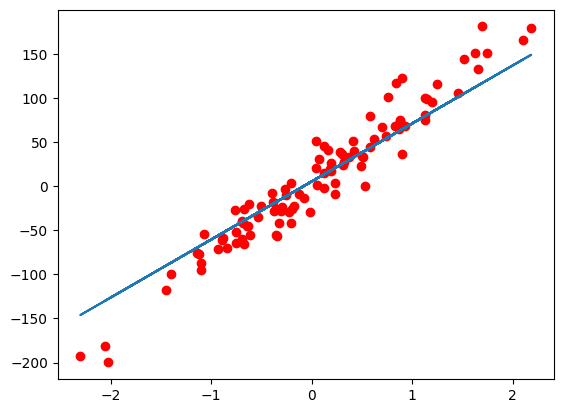

In [83]:
# 0) prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features=1, noise =20, random_state =1)

X = torch.from_numpy(X_numpy.astype(np.float32)) #X_numpy is double, so first convert into float32
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

n_samples, n_features = X.shape

# 1) mode
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 3) training loop
num_epochs = 100

for epoch in range(num_epochs):
  y_predicted = model(X)

  loss = criterion(y_predicted, y)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch +1) % 10 ==0:
    print(f"epoch {epoch+1}: loss = {loss:.4f}")

#plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted)
plt.show()

# Logistic Regression

In [84]:
# 1) design model (input, output size, forward pass)
# 2) construct loss and optimizer
# 3) training loop (forward pass, backward pass, update weights)

In [86]:
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [87]:
# 0) prepare data

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state = 12)

#scale
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)


In [88]:
# 1) model
# f = wx +b, sigmoid at end

class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression,self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 3) training loop
num_epochs = 100

for epoch in range(num_epochs):

  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

  if (epoch +1) % 10 ==0:
    print(f"epoch {epoch+1}: loss = {loss:.4f}")

with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f"accuracy = {acc:.4f}")

epoch 10: loss = 0.5551
epoch 20: loss = 0.4636
epoch 30: loss = 0.4036
epoch 40: loss = 0.3614
epoch 50: loss = 0.3300
epoch 60: loss = 0.3057
epoch 70: loss = 0.2863
epoch 80: loss = 0.2703
epoch 90: loss = 0.2568
epoch 100: loss = 0.2453
accuracy = 0.9474


# Dataset DataLoader

In [89]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [91]:
class WineDataset(Dataset):
  def __init__(self):
    #data loading
    xy = np.loadtxt("wine.csv", delimiter=",", dtype = np.float32)
    self.x = torch.from_numpy(xy[:,1:])
    self.y = torch.from_numpy(xy[:,[0]]) #n_samples, 1
    self.n_samples = xy.shape[0]

  def __getitem__(self, index):
    #dataset [0]
    return self.x[index], self.y[index]

  def __len__(self):
    return self.n_samples

dataset = WineDataset()
dataloader = DataLoader(dataset=dataset, batch_size= 4, shuffle = True, num_workers =2)

#training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    if(i+1) % 5 ==0:
      print(f"epoch: {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, input{inputs.shape}")


178 45
epoch: 1/2, step 5/45, inputtorch.Size([4, 13])
epoch: 1/2, step 10/45, inputtorch.Size([4, 13])
epoch: 1/2, step 15/45, inputtorch.Size([4, 13])
epoch: 1/2, step 20/45, inputtorch.Size([4, 13])
epoch: 1/2, step 25/45, inputtorch.Size([4, 13])
epoch: 1/2, step 30/45, inputtorch.Size([4, 13])
epoch: 1/2, step 35/45, inputtorch.Size([4, 13])
epoch: 1/2, step 40/45, inputtorch.Size([4, 13])
epoch: 1/2, step 45/45, inputtorch.Size([2, 13])
epoch: 2/2, step 5/45, inputtorch.Size([4, 13])
epoch: 2/2, step 10/45, inputtorch.Size([4, 13])
epoch: 2/2, step 15/45, inputtorch.Size([4, 13])
epoch: 2/2, step 20/45, inputtorch.Size([4, 13])
epoch: 2/2, step 25/45, inputtorch.Size([4, 13])
epoch: 2/2, step 30/45, inputtorch.Size([4, 13])
epoch: 2/2, step 35/45, inputtorch.Size([4, 13])
epoch: 2/2, step 40/45, inputtorch.Size([4, 13])
epoch: 2/2, step 45/45, inputtorch.Size([2, 13])


# Dataset Transforms

In [92]:
import torch
import torchvision

In [93]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [96]:
dataset = torchvision.datasets.MNIST(
    root='./data', transform=torchvision.transforms.ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15223566.10it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 463590.35it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4255875.55it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5305076.24it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [97]:
class WineDataset(Dataset):
  def __init__(self, transform=None):
    #data loading
    xy = np.loadtxt("wine.csv", delimiter=",", dtype=np.float32)
    self.x = xy[:,1:]
    self.y = xy[:,[0]] #n_samples, 1
    self.n_samples = xy.shape[0]

    self.transform = transform

  def __getitem__(self,index):
    #dataset[0]
    sample =  self.x[index], self.y[index]
    if self.transform:
      sample = self.transform(sample)
    return sample
  def __len__(self):
    #len dataset
    return self.n_samples

class ToTensor:
  def __call__(self, sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
  def __init__(self, factor):
    self.factor = factor
  def __call__(self,sample):
    inputs, target = sample
    inputs *= self.factor
    return inputs, target

dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


In [98]:
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


# Softmax Crossentropy BCE

In [99]:
import torch
import torch.nn as nn
import numpy as np

In [100]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x), axis = 0)

In [101]:
x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
outputs

array([0.65900114, 0.24243297, 0.09856589])

In [102]:
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
outputs

tensor([0.6590, 0.2424, 0.0986])

In [103]:
def cross_entropy(actual, predicted):
  loss  = -np.sum(actual * np.log(predicted))
  return loss # / float(predicted.shape[0])

In [104]:
#Y must be one hot encoded
Y = np.array([1,0,0])

In [105]:
Y_pred_good =  np.array([0.7,0.2,0.1])
Y_pred_bad =  np.array([0.1,0.3,0.6])
l1  = cross_entropy(Y, Y_pred_good)
l2  = cross_entropy(Y, Y_pred_bad)
l1, l2

(0.35667494393873245, 2.3025850929940455)

In [106]:
#Note
'''
nn.CrossEntropyLoss applies nn.LogSoftmax + nn.NLLLoss (negative log likelihood loss)
-> do not use softmax in last layer when using nn.CrossEntropyLoss

-> Y has class labels, not one-hot
-> Y_pred has raw scores (logits), no softmax

'''

'''
nn.BCELoss does not apply torch.signmoid
-> need to use sigmoid in last layer when using nn.BCELoss

'''

'\nnn.BCELoss does not apply torch.signmoid\n-> need to use sigmoid in last layer when using nn.BCELoss\n\n'

In [107]:
loss = nn.CrossEntropyLoss()


Y = torch.tensor([0])
# nsamples x nclasses = 1 x 3
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) #raw score, not softmax applied
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good,Y)
l2 = loss(Y_pred_bad,Y)
l1.item(), l2.item()

(0.4170299470424652, 1.840616226196289)

In [108]:
_, predictions1 = torch.max(Y_pred_good,1)
_, predictions2 = torch.max(Y_pred_bad,1 )
predictions1, predictions2


(tensor([0]), tensor([1]))

In [109]:
#3 samples

Y = torch.tensor([2,0,1])
# n_samples x n_class = 1x3
Y_pred_good = torch.tensor([[0.04, 1.0, 2.1],[2.0, 1.0, 0.1],[0.2, 2.0, 0.1] ])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3], [0.1, 2.0, 0.1], [2.0, 1.0, 0.1]])
l1 = loss(Y_pred_good,Y)
l2 = loss(Y_pred_bad,Y)

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

l1.item(), l2.item(), predictions1, predictions2

(0.35647499561309814, 1.8731155395507812, tensor([2, 0, 1]), tensor([1, 1, 0]))

In [110]:
#how does it work in a typical NN

#multiclass problem

class NeuralNet2(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet2, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    #no softmax at the end
    return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() # applies softmax

In [113]:
#how does it work in a typical NN

#binaryclass problem

class NeuralNet1(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet1, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)

  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    #sigmoid at the end
    y_pred = torch.sigmoid(out)
    return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss() #does not apply sigmoid itself

# Activation Functions

In [115]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [116]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x ):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.sigmoid(out)
    # or:  out = torch.sigmoid(out) #if not defined in init
    # or:  out = F.sigmoid(out) # F also includes functions like leaky relu which torch does not have
    return out

model = NeuralNet(input_size=28*28, hidden_size=5)

# Feed Forward Networks

In [117]:
'''
MNIST
DataLoader, Transformation
Multilayer Neural Net, activation function
Loss and Optimizer
Training Loop (Batch training)
Model Evaluation
GPU Support
'''

'\nMNIST\nDataLoader, Transformation\nMultilayer Neural Net, activation function\nLoss and Optimizer\nTraining Loop (Batch training)\nModel Evaluation\nGPU Support\n'

In [118]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [119]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [122]:
#hyperparameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

#MNIST
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transforms.ToTensor())


In [123]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle=True)

In [124]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


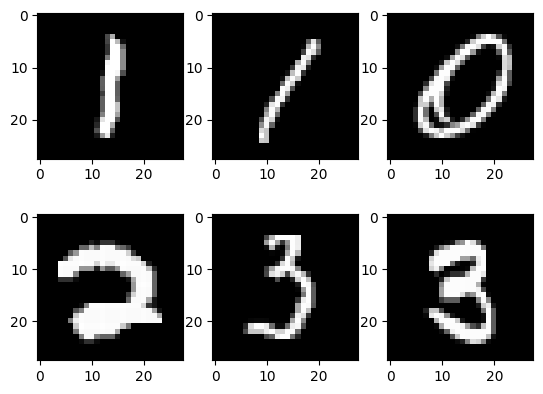

In [125]:
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(samples[i][0], cmap="gray")
plt.show()

In [129]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2  = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    #no softmax as we will use CrossEntropyLoss
    return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

#loss and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)

#training loop

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f"epoch {epoch+1}/ {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")

#test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    # value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions ==labels).sum().item()

  acc = 100.0* n_correct/n_samples
  print(f"accuracy = {acc}")


epoch 1/ 2, step 100/600, loss = 0.5178
epoch 1/ 2, step 200/600, loss = 0.1936
epoch 1/ 2, step 300/600, loss = 0.2803
epoch 1/ 2, step 400/600, loss = 0.2532
epoch 1/ 2, step 500/600, loss = 0.2659
epoch 1/ 2, step 600/600, loss = 0.1542
epoch 2/ 2, step 100/600, loss = 0.2975
epoch 2/ 2, step 200/600, loss = 0.3528
epoch 2/ 2, step 300/600, loss = 0.2121
epoch 2/ 2, step 400/600, loss = 0.1754
epoch 2/ 2, step 500/600, loss = 0.1632
epoch 2/ 2, step 600/600, loss = 0.1957
accuracy = 95.37


# CNN

In [130]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [131]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [132]:
num_epochs = 20
batch_size = 16
learning_rate = 0.001

In [133]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

100%|██████████| 170498071/170498071 [00:03<00:00, 48523591.02it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [138]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  def forward(self, x):
    # -> n, 3, 32, 32
    x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
    x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
    x = x.view(-1, 16 * 5 * 5)            # -> n, 400
    x = F.relu(self.fc1(x))               # -> n, 120
    x = F.relu(self.fc2(x))               # -> n, 84
    x = self.fc3(x)                       # -> n, 10
    return x


In [139]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr =learning_rate)

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
      #origin shape: [4,3,32,32] = 4,3,1024
      #input shape: 3 input channels, 6 output channels, 5 kernel size
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      loss = criterion(outputs, labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if (i+1)%2000 ==0:
        print(f"epoch {epoch+1}/ {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")

print("Finished Training")


epoch 1/ 20, step 2000/3125, loss = 2.2947
epoch 2/ 20, step 2000/3125, loss = 2.2878
epoch 3/ 20, step 2000/3125, loss = 2.2931
epoch 4/ 20, step 2000/3125, loss = 2.0124
epoch 5/ 20, step 2000/3125, loss = 2.0535
epoch 6/ 20, step 2000/3125, loss = 1.9849
epoch 7/ 20, step 2000/3125, loss = 1.8730
epoch 8/ 20, step 2000/3125, loss = 1.9636
epoch 9/ 20, step 2000/3125, loss = 1.7388
epoch 10/ 20, step 2000/3125, loss = 1.4016
epoch 11/ 20, step 2000/3125, loss = 1.4933
epoch 12/ 20, step 2000/3125, loss = 1.6999
epoch 13/ 20, step 2000/3125, loss = 1.4674
epoch 14/ 20, step 2000/3125, loss = 1.7149
epoch 15/ 20, step 2000/3125, loss = 1.6764
epoch 16/ 20, step 2000/3125, loss = 1.5454
epoch 17/ 20, step 2000/3125, loss = 1.6582
epoch 18/ 20, step 2000/3125, loss = 1.8264
epoch 19/ 20, step 2000/3125, loss = 1.9871
epoch 20/ 20, step 2000/3125, loss = 1.1319
Finished Training


In [145]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted==labels).sum().item()

        for i in range(batch_size):
          label = labels[i]
          pred = predicted[i]
          if (label == pred):
            n_class_correct[label] +=1
          n_class_samples[label] +=1

    acc = 100* n_correct/n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
      acc = 100*n_class_correct[i]/ n_class_samples[i]
      print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 50.84 %
Accuracy of plane: 61.2 %
Accuracy of car: 72.8 %
Accuracy of bird: 27.5 %
Accuracy of cat: 35.0 %
Accuracy of deer: 38.9 %
Accuracy of dog: 40.8 %
Accuracy of frog: 66.0 %
Accuracy of horse: 57.3 %
Accuracy of ship: 56.5 %
Accuracy of truck: 52.4 %
